# Image Analysis

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

DATASET_SIZE = 25083

## Original Image Analysis

First load sample image and observe its dimensions and compositions

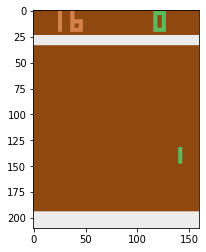

In [3]:
img = load_img('images/pong_1000.png')
plt.imshow(img)

In [3]:
img_arr = img_to_array(img)

print(f"Type: {img_arr.dtype}")

print(f"Shape {img_arr.shape}\n")
print(f"Dimensions:\n  Height: {img.height}\n  Width:  {img.width}")

Type: float32
Shape (210, 160, 3)

Dimensions:
  Height: 210
  Width:  160


Obtain the average image in the dataset by adding and averaging each individual pixel.

Unable to load img 25083


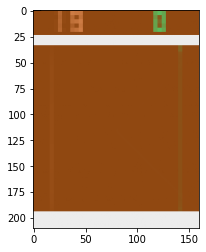

In [15]:
img_avg = np.zeros(img_arr.shape, dtype=float)
amount = DATASET_SIZE
actual = 0

for i in range(amount):
    try:
        img = load_img(f"images/pong_{i}.png")
    except:
        print(f"Unable to load img {i}")
    img_avg += img
    actual += 1

img_avg = img_avg / actual
plt.imshow(img_avg / 255)

From the average image above we can conclude that there are some extra unnecessary spaces in the Y axis.
First of all, the score numbers are not required for the experiments. Secondly, there is a white space at the bottom present in every frame.

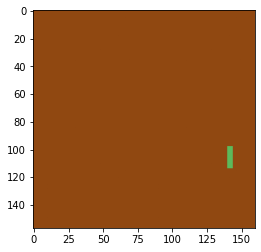

In [16]:
cropped_arr = img_arr[34:191]
plt.imshow(cropped_arr / 255)

From approximation we conclude that only the range from 34 to 191 in the Y axis is the useful bit. We can crop these and obtain a more useful image.

## Transformed Image Analysis

Now we perform the same analysis done with the original image, but now with the transformed image that is fed to the autoencoder.

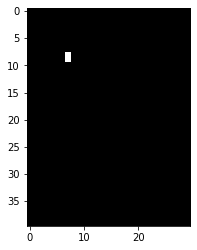

In [2]:
    img = load_img('images_paddleless/pong_paddleless_2000.png', color_mode='grayscale')
plt.imshow(img, cmap='gray')

In [3]:
img_arr = img_to_array(img)

print(f"Type: {img_arr.dtype}")

print(f"Shape {img_arr.shape}\n")
print(f"Dimensions:\n  Height: {img.height}\n  Width:  {img.width}")

Type: float32
Shape (40, 30, 1)

Dimensions:
  Height: 40
  Width:  30


We calculate the average image as well using all the transformed images in the data set

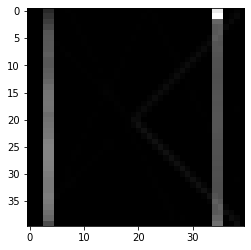

In [8]:
img_avg = np.zeros(img_arr.shape, dtype=float)
amount = DATASET_SIZE
actual = 0

for i in range(amount):
    try:
        img = load_img(f"images_trans/pong_trans_{i}.png", color_mode='grayscale')
        img_arr = img_to_array(img)
    except:
        pass
        #print(f"Unable to load img {i}")
    img_avg += img_arr
    actual += 1

img_avg = img_avg / actual
plt.imshow(img_avg / 255, cmap='gray')

The above image reveals a key element in the dataset. It shows how balanced it is in terms of the position of both of the paddles. If there is a well distributed line in each side, it means that it is a representative dataset in terms of all positions possible, if the line is significantly stronger on some areas, it means that the dataset is umbalanced, which could cause trouble when training the autoencoder.